# Unsupervised Learning Program Assignment 1

### Yosef Shimon Sella

## Library Imports



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

## 1. SVD vs PCA in 2D
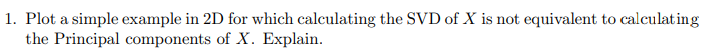

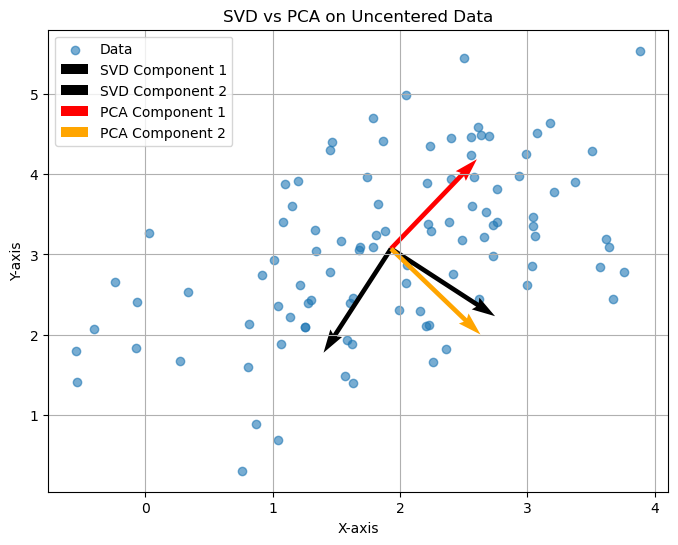

In [2]:
# Generate a simple 2D dataset
np.random.seed(0)
data = np.random.multivariate_normal(mean=[2, 3], cov=[[1, 0.5], [0.5, 1]], size=100)

# Compute SVD without centering
u, s, vh = np.linalg.svd(data)

# Compute PCA with centering
pca = PCA(n_components=2)
pca.fit(data)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Data')

quiver_scale = 5
plt.quiver(*data.mean(axis=0), *vh[0], scale=quiver_scale, label='SVD Component 1')
plt.quiver(*data.mean(axis=0), *vh[1], scale=quiver_scale, label='SVD Component 2')
plt.quiver(*data.mean(axis=0), *pca.components_[0], scale=quiver_scale, color='red', label='PCA Component 1')
plt.quiver(*data.mean(axis=0), *pca.components_[1], scale=quiver_scale, color='orange', label='PCA Component 2')
plt.legend()
plt.title("SVD vs PCA on Uncentered Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()

We get different components for the PCA and the SVD because the part of the PCA function centers the data while the SVD doesn't.

Text(0.5, 1.0, 'Projected data from PCA')

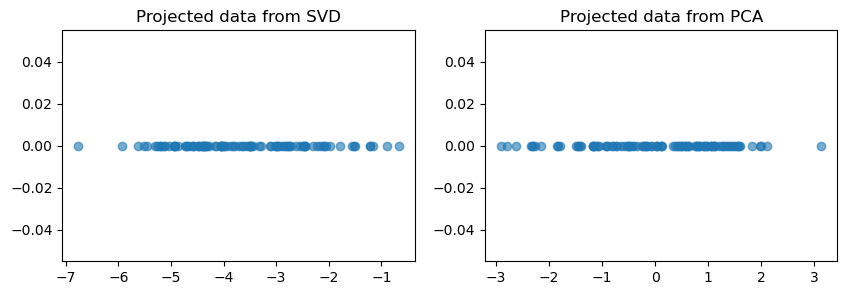

In [3]:
# placeholder for the different projections.
projected_data_svd = data @ vh.T
projected_data_pca = pca.fit_transform(data)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(projected_data_svd[:, 0], np.zeros_like(projected_data_svd[:, 0]), alpha=0.6, label='Data')
axes[0].set_title(label='Projected data from SVD')
axes[1].scatter(projected_data_pca[:, 0], np.zeros_like(projected_data_pca[:, 0]), alpha=0.6, label='Data')
axes[1].set_title(label='Projected data from PCA')


As we can see, the projections are different between the two methods.

## Downloading MNIST dataset

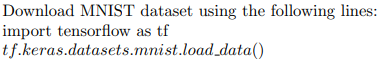

In [4]:
import tensorflow.keras as keras

(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

## 2. Projecting Digit '3' to 2D Using PCA

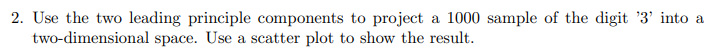

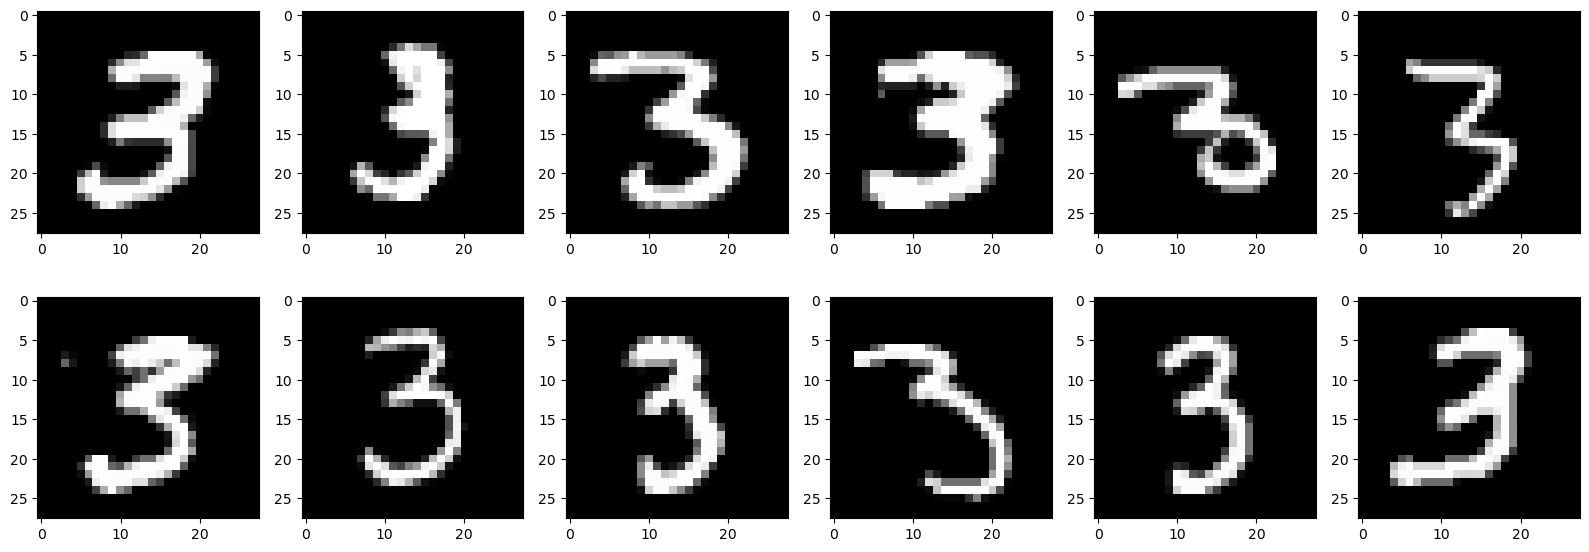

In [5]:
# Filter for digit '3'
# Select 1000 samples of digit '3' for this task
digit_3 = train_data[train_labels == 3][:1000]

# Show the digits selected
figure = plt.figure(figsize=(16,6))
rows   = 2
cols   = 6
for i in range(rows * cols):
    subplot = figure.add_subplot(rows, cols, i+1)
    plt.imshow(digit_3[i], cmap='gray')
plt.tight_layout()

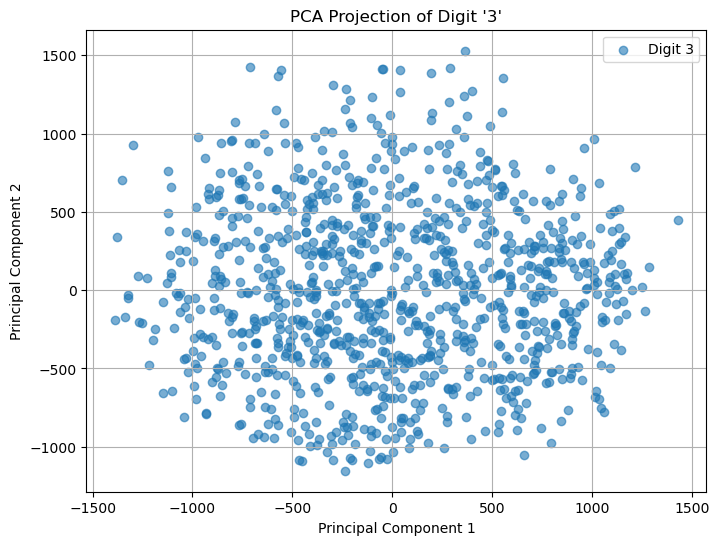

In [6]:

# Flatten images and apply PCA
digit_3_flat = digit_3.reshape(1000,-1)
pca          = PCA(n_components=2)
digit_3_pca  = pca.fit_transform(digit_3_flat)

# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(digit_3_pca[:, 0], digit_3_pca[:, 1], alpha=0.6, label='Digit 3')
plt.legend()
plt.title("PCA Projection of Digit '3'")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

## 3. Projecting Digit '5' to 2D Using PCA

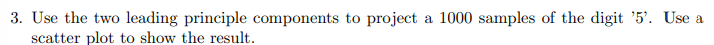

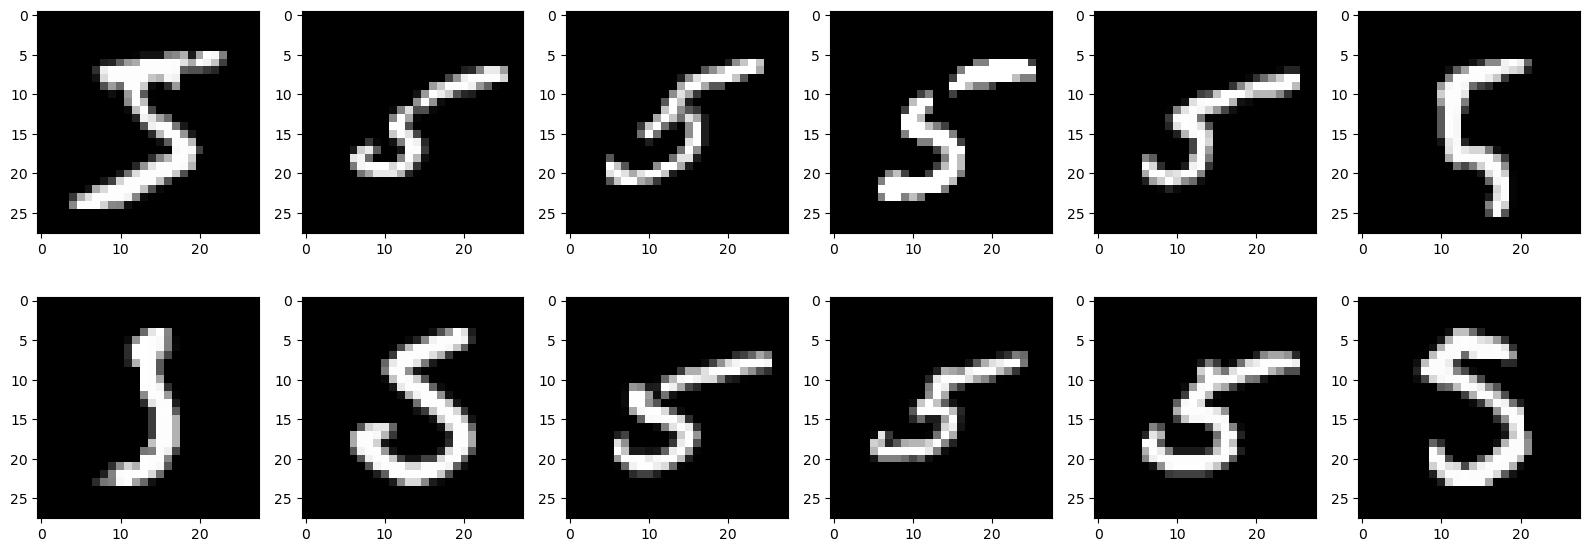

In [7]:
# Filter for digit '5'
# Select 1000 samples of digit '5' for this task
digit_5 = train_data[train_labels == 5][:1000]

# Show the digits selected
figure = plt.figure(figsize=(16,6))
rows   = 2
cols   = 6
for i in range(rows * cols):
    subplot = figure.add_subplot(rows, cols, i+1)
    plt.imshow(digit_5[i], cmap='gray')
plt.tight_layout()

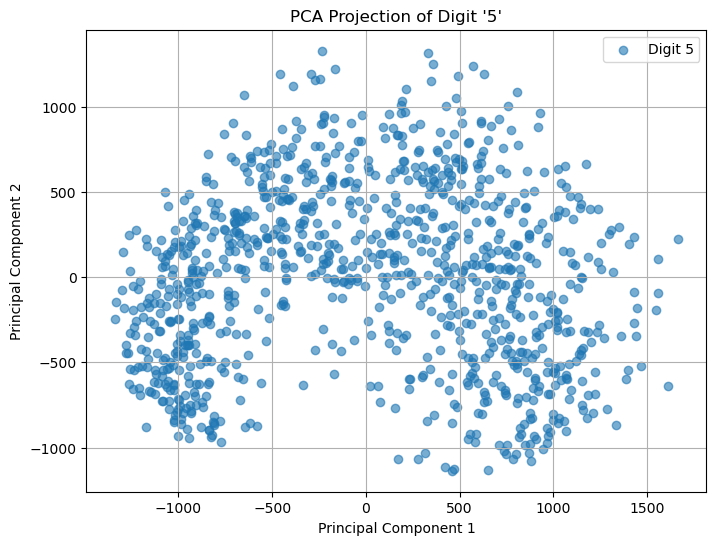

In [8]:
# Flatten images and apply PCA
digit_5_flat = digit_5.reshape(1000,-1)
pca          = PCA(n_components=2)
digit_5_pca  = pca.fit_transform(digit_5_flat)

# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(digit_5_pca[:, 0], digit_5_pca[:, 1], alpha=0.6, label='Digit 5')
plt.legend()
plt.title("PCA Projection of Digit '5'")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

## 4. Combined Scatter Plot for Digits '3' and '5'

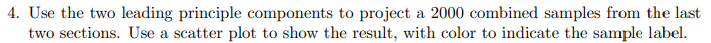

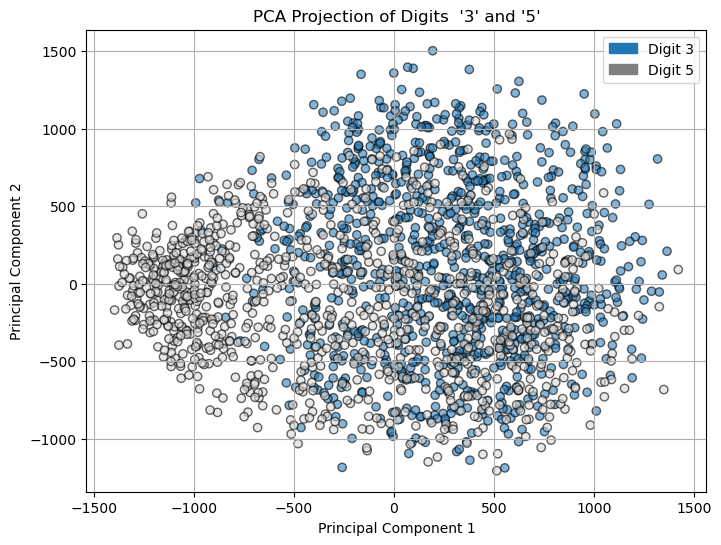

In [9]:
# Combining digits 3 and 5
digits_3_5 = np.vstack((digit_3_flat, digit_5_flat))
labels_3_5 = np.array([3] * 1000 + [5] * 1000)

# Applying PCA to the combined digits
digits_3_5_pca = pca.fit_transform(digits_3_5)

# #
# cov_3_5 = digits_3_5.T @  digits_3_5
# l_3_5, v_3_5 = np.linalg.eigh(cov_3_5)

# v_3_5 = v_3_5[:,np.argsort(-l_3_5)]
# l_3_5 = l_3_5[np.argsort(-l_3_5)]
# #
# proj_3_5 = digits_3_5 @ v_3_5

import matplotlib.patches as mpatches

# Plot Results
plt.figure(figsize=(8,6))
plt.scatter(digits_3_5_pca[:, 0], digits_3_5_pca[:, 1], c= labels_3_5, cmap='tab20c', edgecolor='k', alpha=0.6)

legend_patches = [
    mpatches.Patch(color='tab:blue', label='Digit 3'),
    mpatches.Patch(color='tab:gray', label='Digit 5')
]
plt.legend(handles=legend_patches)
plt.title("PCA Projection of Digits  '3' and '5'")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

## 5. Component to capture 90% of Variance

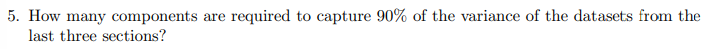

In [10]:
# Defining a PCA class with the desired number of variance captured from the data 
pca90 = PCA(0.90)

In [11]:
# Calculating for digit '3'
digit_3_pca90 = pca90.fit_transform(digit_3_flat)
num_components_3_90 = pca90.explained_variance_ratio_.size

print(f"Number of components required to capture 90% variance for digit 3: {num_components_3_90}")

Number of components required to capture 90% variance for digit 3: 73


In [12]:
# Calculating for digit '5'
digit_5_pca90 = pca90.fit_transform(digit_5_flat)
num_components_5_90 = pca90.explained_variance_ratio_.size

print(f"Number of components required to capture 90% variance for digit 5: {num_components_5_90}")

Number of components required to capture 90% variance for digit 5: 66


In [13]:
# Calculating for digits '3' and '5'
digit_3_5_pca90 = pca90.fit_transform(digits_3_5)
num_components_3_5_90 = pca90.explained_variance_ratio_.size

print(f"Number of components required to capture 90% variance for digits 3 and 5: {num_components_3_5_90}")

Number of components required to capture 90% variance for digits 3 and 5: 76


## Selecting all samples from an object form COIL20 dataset

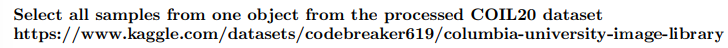

In [14]:
import kagglehub
path = kagglehub.dataset_download("codebreaker619/columbia-university-image-library")
print("Path to dataset files:", path)


c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\yossi\.cache\kagglehub\datasets\codebreaker619\columbia-university-image-library\versions\1


In [15]:
import os
from PIL import Image
import natsort

def load_COIL20_images(dataset_path, proc=True): #proc is for Processed or Unprocessed data
    images = []
    labels = []
    for root, dirs, files in os.walk(dataset_path):
        if proc and "coil-20-proc" in root:
            break
    for filename in natsort.natsorted(files):
        if filename.endswith('.png'):
            image_path = os.path.join(root, filename)
            image = Image.open(image_path).convert('L')
            images.append(np.array(image))
            labels.append(int((filename.split('_')[0]).replace('obj', '')))
    return np.array(images), np.array(labels)

coil20_data, coil20_labels = load_COIL20_images(path)
print(f"Loaded dataset with shape: {coil20_data.shape}")
print(f"Labels shape: {coil20_labels.shape}")

Loaded dataset with shape: (1440, 128, 128)
Labels shape: (1440,)


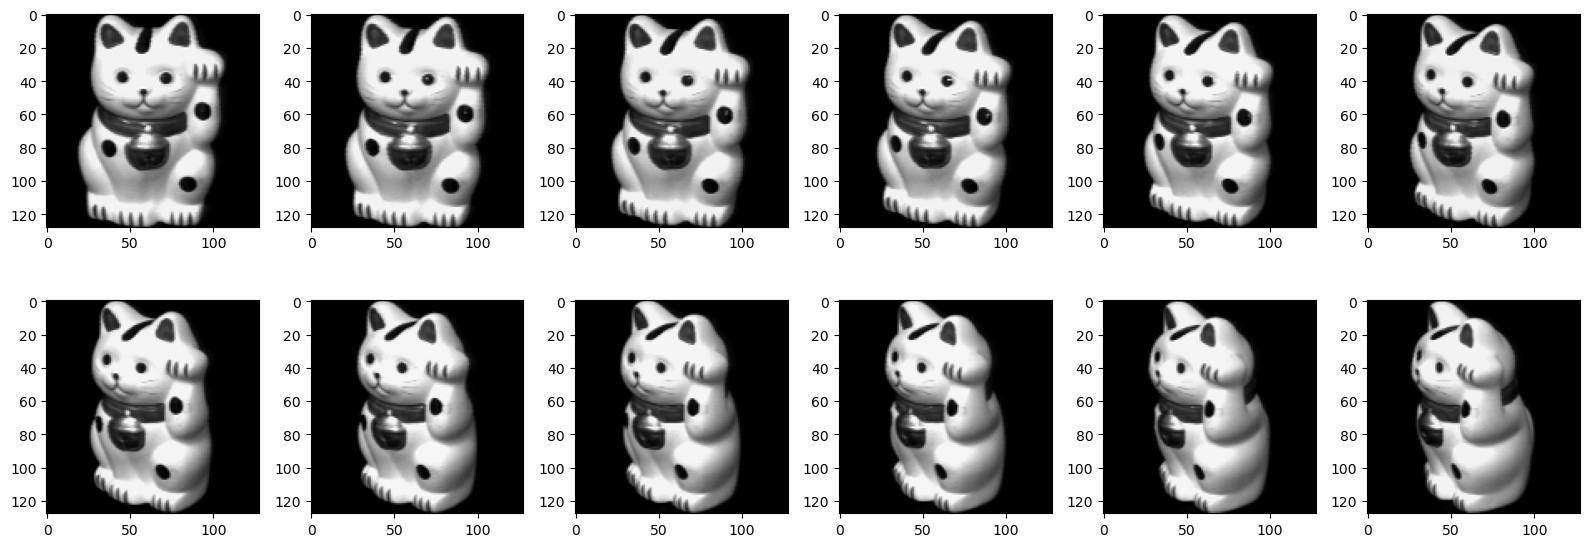

In [16]:
# Selecting the object
coil20_obj_4 = coil20_data[coil20_labels == 4]

# Show the object selected
figure = plt.figure(figsize=(16,6))
rows   = 2
cols   = 6
for i in range(rows * cols):
    subplot = figure.add_subplot(rows, cols, i+1)
    plt.imshow(coil20_obj_4[i], cmap='gray')
plt.tight_layout()

In [17]:
# Center the images (subtract mean)
coil20_data_centered = coil20_data - np.mean(coil20_data, axis=0)

# Normalize the images (divide by standard deviation)
coil20_data_normalized = coil20_data_centered / np.std(coil20_data_centered, axis=0)

# Verify the mean and variance
print(f"Mean of Uncentered data: {np.mean(coil20_data):.2f}, Mean of centered data: {np.mean(coil20_data_centered):.2f}")
print(f"Mean of Unnormalized (but centered) data: {np.mean(coil20_data_centered):.2f}, Mean of normalized data: {np.mean(coil20_data_normalized):.2f}")
print(f"Std deviation of unnormalized data: {np.std(coil20_data):.2f}, Std deviation of normalized data: {np.std(coil20_data_normalized):.2f}")


Mean of Uncentered data: 76.90, Mean of centered data: -0.00
Mean of Unnormalized (but centered) data: -0.00, Mean of normalized data: 0.00
Std deviation of unnormalized data: 82.52, Std deviation of normalized data: 1.00


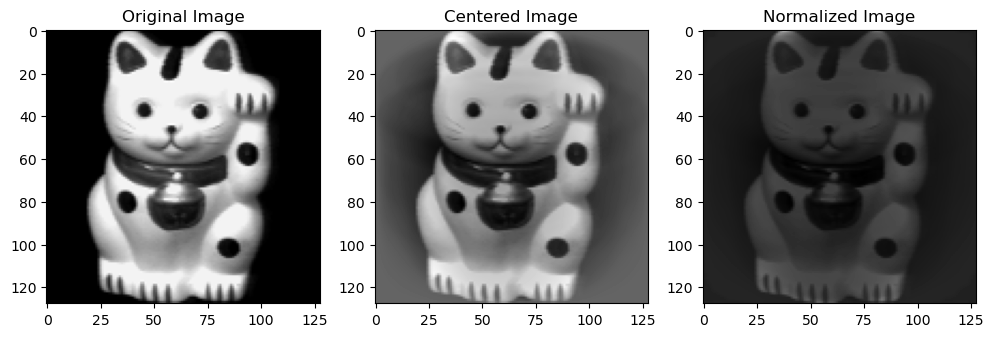

In [18]:
# Visualize original vs. centered/normalized images
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(coil20_data[coil20_labels == 4][0], cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(coil20_data_centered[coil20_labels == 4][0], cmap='gray')
plt.title("Centered Image")

plt.subplot(1, 3, 3)
plt.imshow(coil20_data_normalized[coil20_labels == 4][0], cmap='gray')
plt.title("Normalized Image")

plt.show()

## 6. Embedding the object selected in a two-dimentional space usning Diffusion Maps

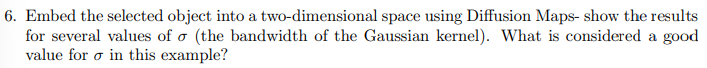

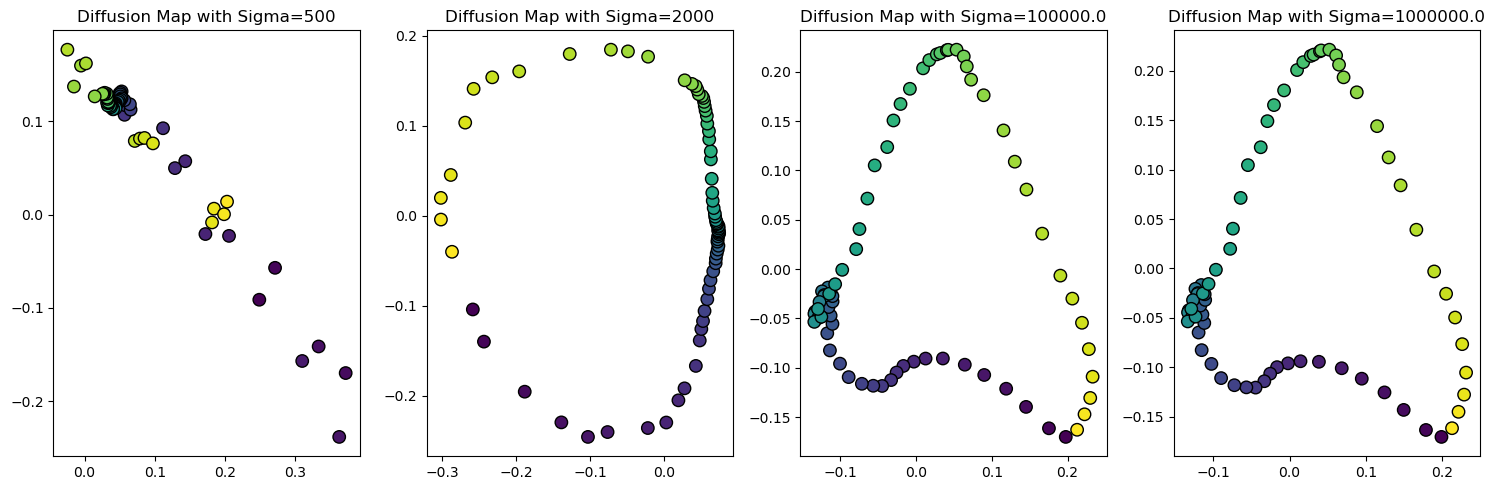

In [19]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance_matrix
from scipy.sparse.linalg import eigsh


def diffusion_maps(data, sigma, n_components=2):
    distances = euclidean_distances(data, data)
    kernel    = np.exp(-distances**2 / (sigma))
    D_minus   = np.diag(np.sum(kernel, axis=1)**(-1))
    P         = D_minus@kernel

    eigenvalues, eigenvectors = eigsh(P, k=n_components + 1, which= 'LM')
    return np.real(eigenvectors[:, np.argsort(-eigenvalues)])  

coil20_obj_4_normalized = coil20_data_normalized[coil20_labels == 4]
obj_4_flat              = coil20_obj_4_normalized.reshape(coil20_obj_4_normalized.shape[0], coil20_obj_4_normalized.shape[1]*coil20_obj_4_normalized.shape[2]).astype('double')

sigmas = [500, 2000, 1e5, 1e6]

import matplotlib.cm as cm

colors = cm.viridis(np.linspace(0,1, obj_4_flat.shape[0]))
fig    = plt.figure(figsize=(15,5))

for i, sigma in enumerate(sigmas):
    embedded = diffusion_maps(obj_4_flat, sigma=sigma)
    subplot  = fig.add_subplot(1, len(sigmas), i+1)
    plt.scatter(embedded[:, 1], embedded[:, 2], c=colors, marker='o', s=80, edgecolor='k')
    subplot.set_title(f"Diffusion Map with Sigma={sigma}")
plt.tight_layout()
plt.show()


As we can see from the plots obtained, the value of $\sigma$ changes the shape of the embedding. For a lower value, we get a misorganized shape as it cannot capture the local connections, and $\mathbf{W}_{ij}$ approaches $\mathbf{I}$. When $\sigma$ is set to a higher value, it captures all connections (including those that we do not want), and $\mathbf{W}_{ij}$ approaches $\mathbf{J}$ (a matrix of all ones).

## 7. Embedding the the COIL20 objects using T-SNE

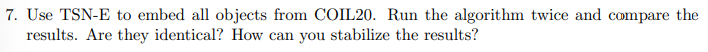

TSNE Runtime: 2.8018016815185547s
TSNE Runtime: 2.6073191165924072s


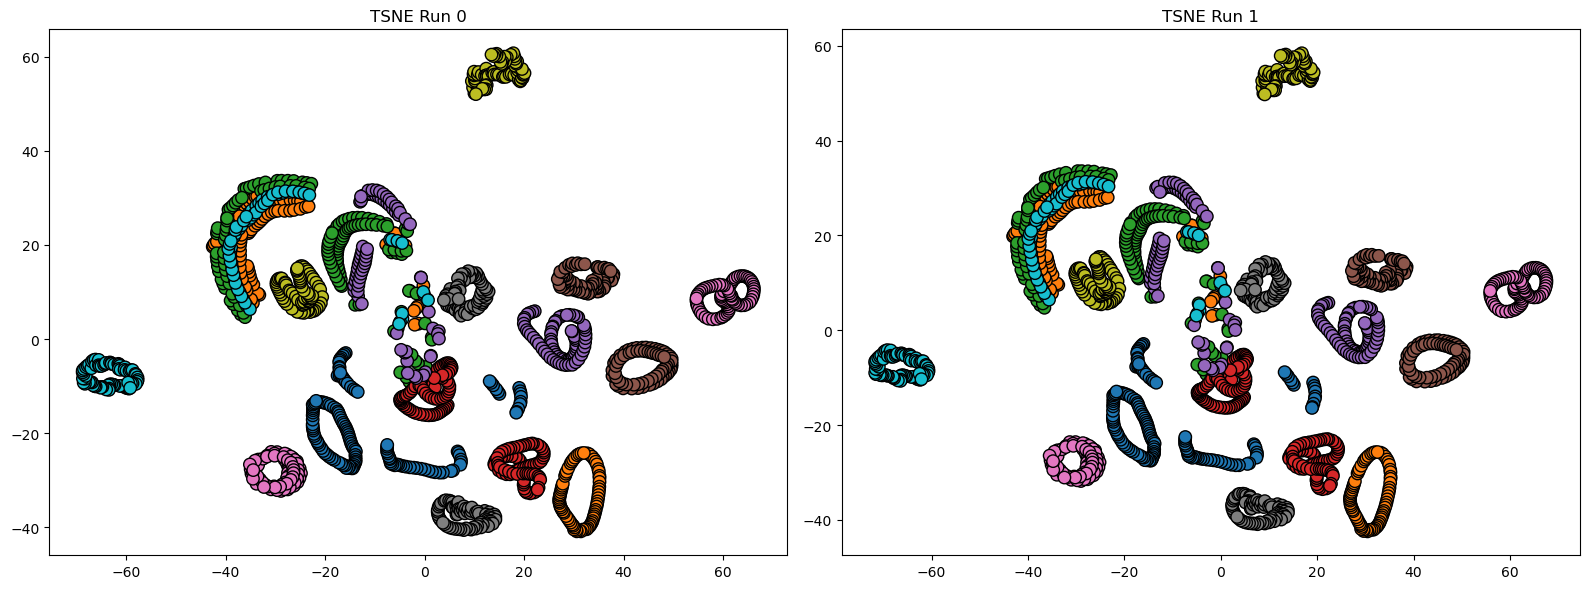

TSNE after PCA Runtime: 2.0676774978637695s
TSNE with PCA Runtime: 2.477329730987549s


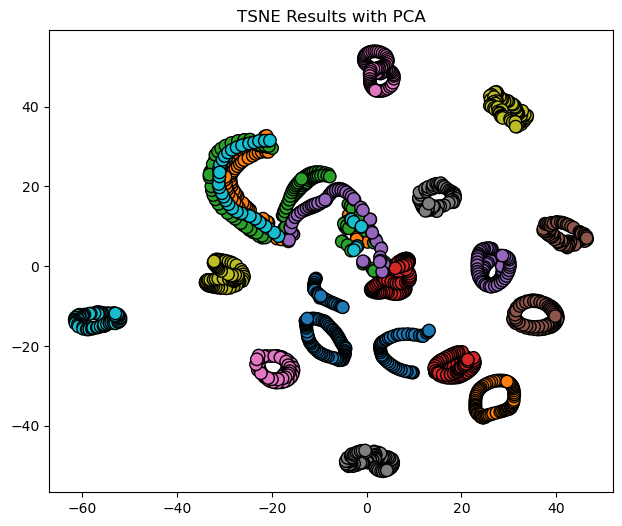

In [20]:
from sklearn.manifold import TSNE

import time

coil20_data_normalized_flat = coil20_data_normalized.reshape(coil20_data_normalized.shape[0], coil20_data_normalized.shape[1]*coil20_data_normalized.shape[2]).astype('double')
coil20_data_flat = coil20_data.reshape(coil20_data.shape[0], coil20_data.shape[1]*coil20_data.shape[2]).astype('double')


fig    = plt.figure(figsize=(16,6))
colors = cm.viridis(np.linspace(0,1, coil20_data_normalized_flat.shape[0]))

for i in range(2):
    start_tsne       = time.time()
    tsne_coil20_data = TSNE(n_components=2, random_state=i).fit_transform(coil20_data_normalized_flat)
    end_tsne         = time.time()
    print(f"TSNE Runtime: {end_tsne - start_tsne}s")
    
    subplot  = fig.add_subplot(1, 2, i + 1)
    plt.scatter(tsne_coil20_data[:, 0], tsne_coil20_data[:, 1], c=coil20_labels, cmap='tab10', marker='o', s=80, edgecolor='k')
    subplot.set_title(f"TSNE Run {i}")
plt.tight_layout()
plt.show()


start_pca       = time.time()
pca_coil20_data = PCA(n_components=50).fit_transform(coil20_data_normalized_flat)
end_pca         = time.time()

start_tsne           = time.time()
tsne_pca_coil20_data = TSNE(n_components=2, random_state=1).fit_transform(pca_coil20_data)
end_tsne             = time.time()

print(f"TSNE after PCA Runtime: {end_tsne - start_tsne}s")
print(f"TSNE with PCA Runtime: {end_tsne - start_tsne + end_pca - start_pca}s")

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(tsne_pca_coil20_data[:, 0], tsne_pca_coil20_data[:, 1], c=coil20_labels, cmap='tab10', marker='o', s=80, edgecolor='k')
plt.title("TSNE Results with PCA")
plt.show()



As we can see from the first two graphs, with different random initializations the results of the T-SNE is different for every iteration.
This is because the algorithm is stochastic in nature.

in oreder to stabilize the results it is usefull to do PCA before the T-SNE. It reduces the number of dimensions as it suppresses some noise and speeds up the computation of pairwise distances between samples.
As we can see from the results the runtime of the T-SNE on the data post PCA transformation is lower (though the actual time of the PCA algorithm needs to be accounted for).

## 8. Comparing the results from T-SNE to UMAP

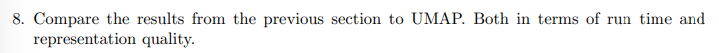

c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


UMAP Runtime: 10.705755949020386s


c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


UMAP Runtime: 6.057777404785156s


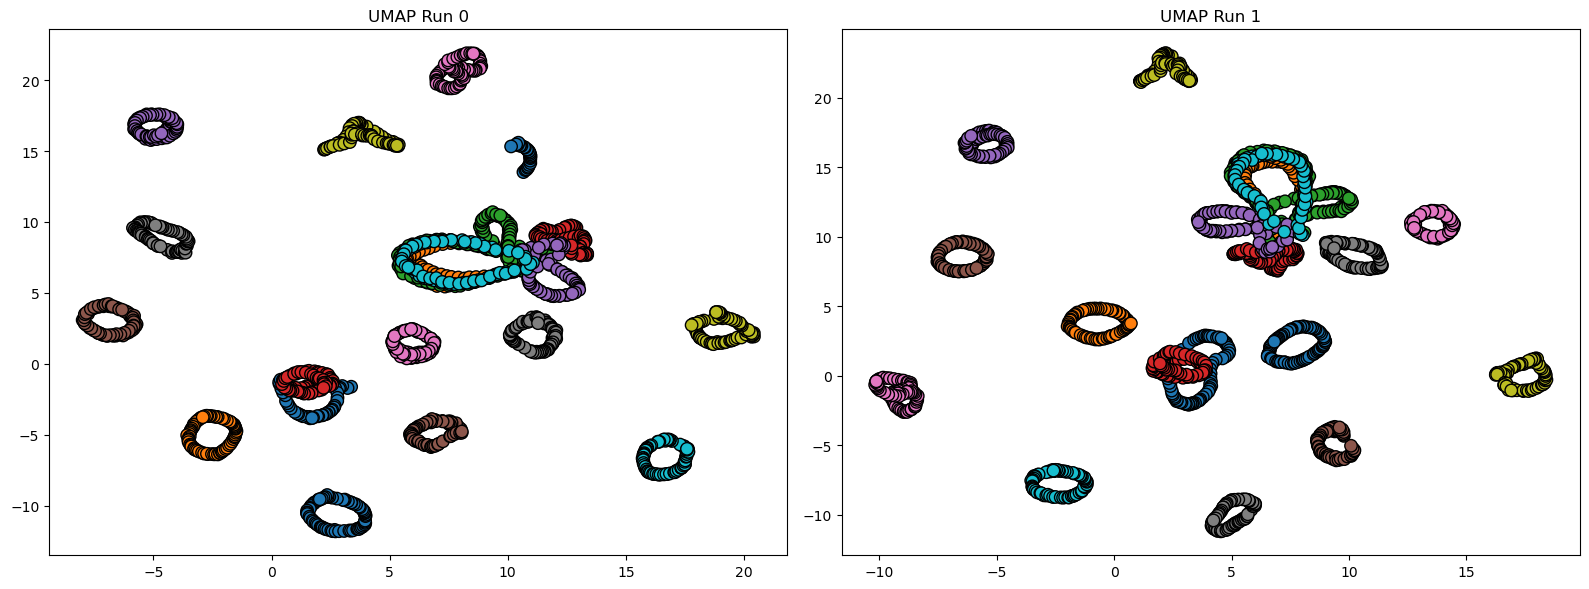

c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\yossi\anaconda3\envs\venv_UL_prog1\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


UMAP after PCA Runtime: 2.106013059616089s
UMAP with PCA Runtime: 2.4663031101226807s


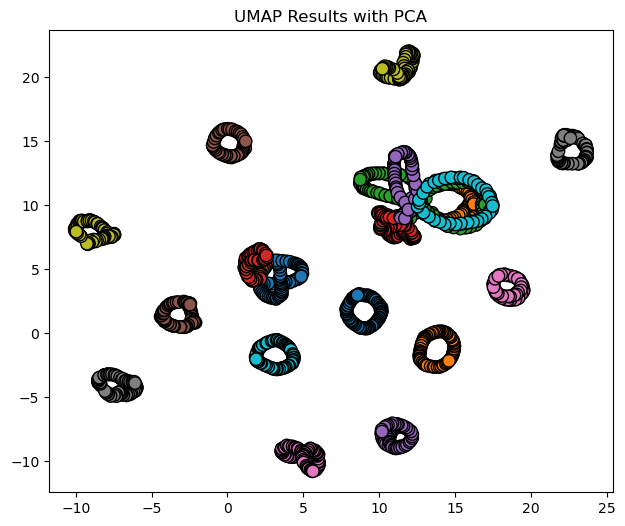

In [21]:
import umap.umap_ as umap
import sys 
import warnings

# # Suppress specific warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=UserWarning)

fig    = plt.figure(figsize=(16,6))
colors = cm.viridis(np.linspace(0,1, coil20_data_normalized_flat.shape[0]))

for i in range(2):
    start_umap       = time.time()
    
    # with warnings.catch_warnings():
    #     warnings.simplefilter("ignore")  # Suppress warnings inside the block
    umap_coil20_data = umap.UMAP(n_components=2, random_state=i, n_neighbors=10, min_dist=0.3).fit_transform(coil20_data_normalized_flat)
    
    end_umap         = time.time()
    
    print(f"UMAP Runtime: {end_umap - start_umap}s")
    sys.stdout.flush()  # Ensure output is immediately displayed

    
    subplot  = fig.add_subplot(1, 2, i + 1)
    plt.scatter(umap_coil20_data[:, 0], umap_coil20_data[:, 1], c=coil20_labels, cmap='tab10', marker='o', s=80, edgecolor='k')
    subplot.set_title(f"UMAP Run {i}")
plt.tight_layout()
plt.show()

start_pca       = time.time()
pca_coil20_data = PCA(n_components=50).fit_transform(coil20_data_normalized_flat)
end_pca         = time.time()

start_umap           = time.time()
umap_pca_coil20_data = umap.UMAP(n_components=2, random_state=1, n_neighbors=10, min_dist=0.3).fit_transform(pca_coil20_data)
end_umap             = time.time()

print(f"UMAP after PCA Runtime: {end_umap - start_umap}s")
print(f"UMAP with PCA Runtime: {end_umap - start_umap + end_pca - start_pca}s")

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(umap_pca_coil20_data[:, 0], umap_pca_coil20_data[:, 1], c=coil20_labels, cmap='tab10', marker='o', s=80, edgecolor='k')
plt.title("UMAP Results with PCA")
plt.show()



We can see from the plots UMAP was able to produce a better lower dimention embedding as the objects are more separated and compact from one another comparing to the T-SNE plots. This corresponds to what we know, as UMAP attempts to preserve both the local and global structure of the dataset. 

Regarding the runtime, theoretically UMAP should be faster than T-SNE and is known to be more scallable, but here we see poorer results.
This may be due to backend optimizations of the UMAP module, Though we do see a minor improvement of UMAP over T-SNE when PCA is performed beforhand.